In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.stats import zscore
from sklearn.metrics import roc_curve,auc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import recall_score

In [230]:
df=pd.read_csv("database_IND.csv")

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

-  country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long` (text): longer form of the country designation
- name` (text): name or title of the power plant, generally in Romanized form
- gppd_idnr` (text): 10 or 12 character identifier for the power plant
- capacity_mw` (number): electrical generating capacity in megawatts
- latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel` (text): energy source used in primary electricity generation or export
- other_fuel1` (text): energy source used in electricity generation or export
- other_fuel2` (text): energy source used in electricity generation or export
- other_fuel3` (text): energy source used in electricity generation or export
- commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- owner` (text): majority shareholder of the power plant, generally in Romanized form
- source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url` (text): web document corresponding to the `source` field
- geolocation_source` (text): attribution for geolocation information
- wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data` (number): year the capacity information was reported
- generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source` (text): attribution for the reported generation information
- estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


Fuel Type Aggregation:

We define the "Fuel Type" attribute of our database based on common fuel categories. 

__Prediction :   Make two prediction  1) Primary Fuel- Classification Problem    2) capacity_mw- Regression Problem__


In [231]:
df.shape

(908, 25)

In [232]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

we can see we have some categorical columns and some numerical columns.

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

### Check Missing values:  

In [234]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

As we can see that there are a lot of null values present in the dataset. So, it is feasible to drop the columns where the null values are 65% of the data. Also, we can drop those columns where there is only 1 unique value present or all unique value present( as it is kind of ordinal data which chamges for every datapoint, meaning it won't be able to contribute any information to the model as there wouldn't be any pattern to be formed in such a column. Hence no generaliation would be made by the model using this column)

In [8]:
df.describe(include="all")

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,Jangi Wind Farm,IND0000420,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


In [235]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Columns that we can drop straightaway are:
- otherfuel2
- country
- country_long
- otherfuel3
- year_of_capacity_data 
- generation_data_source
- wepp_id
- estimated_generation_gwh
- name    
- gppd_idnr

In [236]:
df.drop(['other_fuel2', 'country','country_long','other_fuel3','year_of_capacity_data','generation_data_source','wepp_id','estimated_generation_gwh','name','gppd_idnr'], axis = 1,inplace=True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          199 non-null    object 
 5   commissioning_year   528 non-null    float64
 6   owner                342 non-null    object 
 7   source               908 non-null    object 
 8   url                  908 non-null    object 
 9   geolocation_source   889 non-null    object 
 10  generation_gwh_2013  384 non-null    float64
 11  generation_gwh_2014  401 non-null    float64
 12  generation_gwh_2015  425 non-null    float64
 13  generation_gwh_2016  437 non-null    float64
 14  generation_gwh_2017  443 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [237]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  566
source                   0
url                      0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

We are now left with only 15 columns with float and object datatypes. This is a better dataframe and will yield better models compared to the earlier dataframe as it has imporved data points.

We can find percentage of data in each column which is missing and can resmove columns with more than 65%, and also remove the duplicates in the dataset.

In [239]:
df.drop_duplicates(inplace=True)

In [240]:
df.shape

(908, 15)

No duplicates were present!

When I tried to inmpute the missing values at this step, it created problem in the EDA and when I crosschecked my values from the dataset, I realized the visualizations being prepared are not correct. Also, I would like to mention, when the dataset has null values which are scarce, then it is advisable to perform data imputation before the EDA. But in this case, where most of the columns have a lot of null values, this can create incorrect plots conveying wrong insights about the dataset. Hence, it's necessary to postpone the data imputation step to post EDA.

In [62]:
num_df = df.select_dtypes(include="float64")

In [63]:
cat_df=df.select_dtypes(include="object")

# EDA:

In [72]:
cat_df.columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source'], dtype='object')

In [73]:
num_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

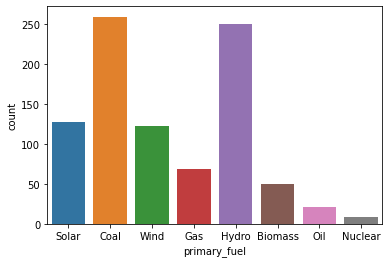

In [21]:
# sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=cat_df)
plt.show()


Observation: Coal and Hydro are the most used primary fuel sources whereas Nuclear and Oil are at the bottom. We can also infer that Renewables sources are now quickly catching up with coal which is dominant in India.

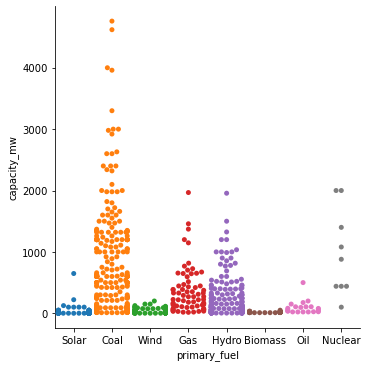

In [45]:
sns.catplot(x="primary_fuel",y='capacity_mw',data=df, kind="swarm")

Observation: 
- Coal power plants are still majorly responsible for producing the most power. The capacity in mw per plant is higher than any other fuel power plant where production is above 2000MW. Also nuclear power plants are very less compared to other but they pack a huge punch, as after coal they are the only one capable of producing 2000MW per plant. This shows that coal and oil will continue to dominate until India develops a more robust renewable fuel power plant. 

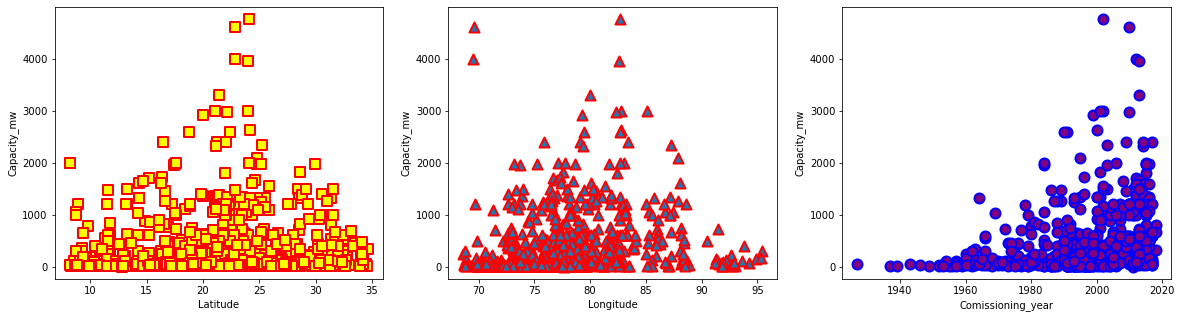

In [106]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(y='capacity_mw',x='latitude',data=df,c ="yellow",linewidths = 2, marker ="s", edgecolor ="red", s = 100)
plt.xlabel("Latitude")
plt.ylabel("Capacity_mw")

plt.subplot(1,3,2)
plt.scatter(y='capacity_mw',x='longitude',data=df,edgecolor="red",marker ="^",linewidths = 2,s = 100)
plt.xlabel("Longitude")
plt.ylabel("Capacity_mw")

plt.subplot(1,3,3)
plt.scatter(y='capacity_mw',x='commissioning_year',data=df,edgecolor="blue",linewidths = 2,s = 100,c="purple")
plt.xlabel("Comissioning_year")
plt.ylabel("Capacity_mw")

plt.show()

Observations:
- Highest power producing plants are located in the 15-25 latitude range.
- Highest power producing plants are located in the 77-85 longitude range.
- Highest power producing plants are comissioned in between 200 to 2020, which makes sense as newer plants will have better technology thus producing more enegy.

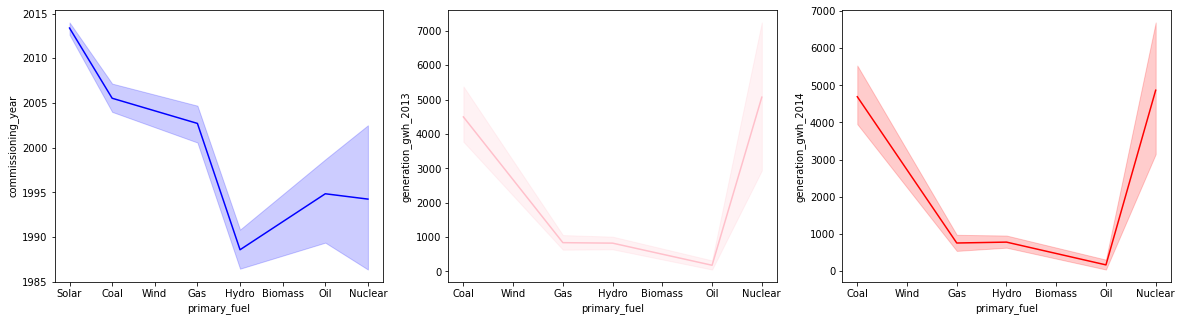

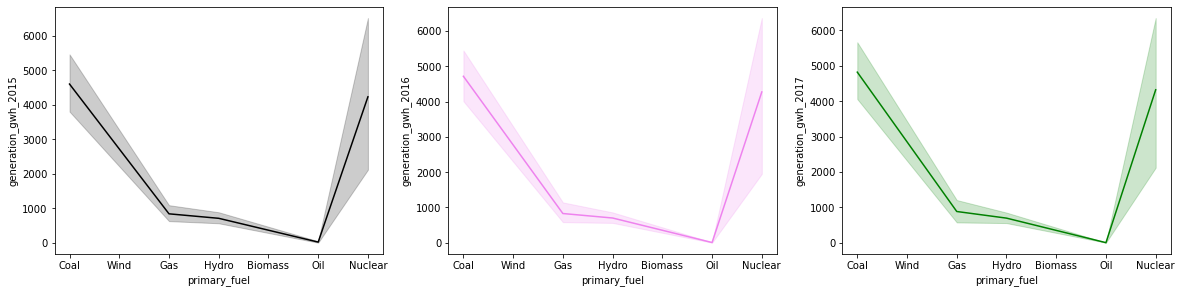

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.lineplot(x="primary_fuel",y='commissioning_year',data=df, color='blue')
plt.subplot(1,3,2)
sns.lineplot(x="primary_fuel",y='generation_gwh_2013',data=df, color='pink')
plt.subplot(1,3,3)
sns.lineplot(x="primary_fuel",y='generation_gwh_2014',data=df, color='red')
plt.show()
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.lineplot(x="primary_fuel",y='generation_gwh_2015',data=df, color='black')
plt.subplot(2,3,2)
sns.lineplot(x="primary_fuel",y='generation_gwh_2016',data=df, color='violet')
plt.subplot(2,3,3)
sns.lineplot(x="primary_fuel",y='generation_gwh_2017',data=df, color='green')

plt.show()

Observations:
- Hydro plants were most sanctioned in 1990's and most solar power plants are being sanctioned in 2010's. Coal power plants in the dataset are also relatively new as they were commisioned in 2005.
- Generation data of solar power plants is not available in dataset.
- Coal power capacity has seen a marginal increase in 2017 compared to other years.
- Nuclear power plants have been providing almost equal power compared to coal.
- Oil has been the lowest power producing source in India.

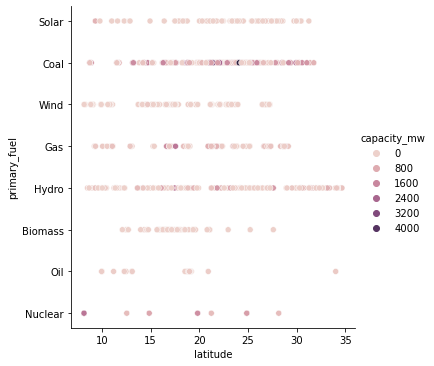

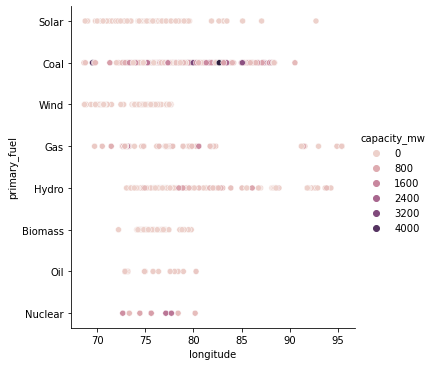

In [134]:
sns.relplot(y="primary_fuel",x='latitude',data=df,hue="capacity_mw")
plt.show()
sns.relplot(y="primary_fuel",x='longitude',data=df,hue="capacity_mw")

Observations:
- At lower latitudes, Hydro and Wind power plants are present in lower latitudes producing less than 800MW.
- Most of the high power producing plants are located on the higher end of longitude ranging from 80-90.

Lets create plots for numerical features

In [135]:
num_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

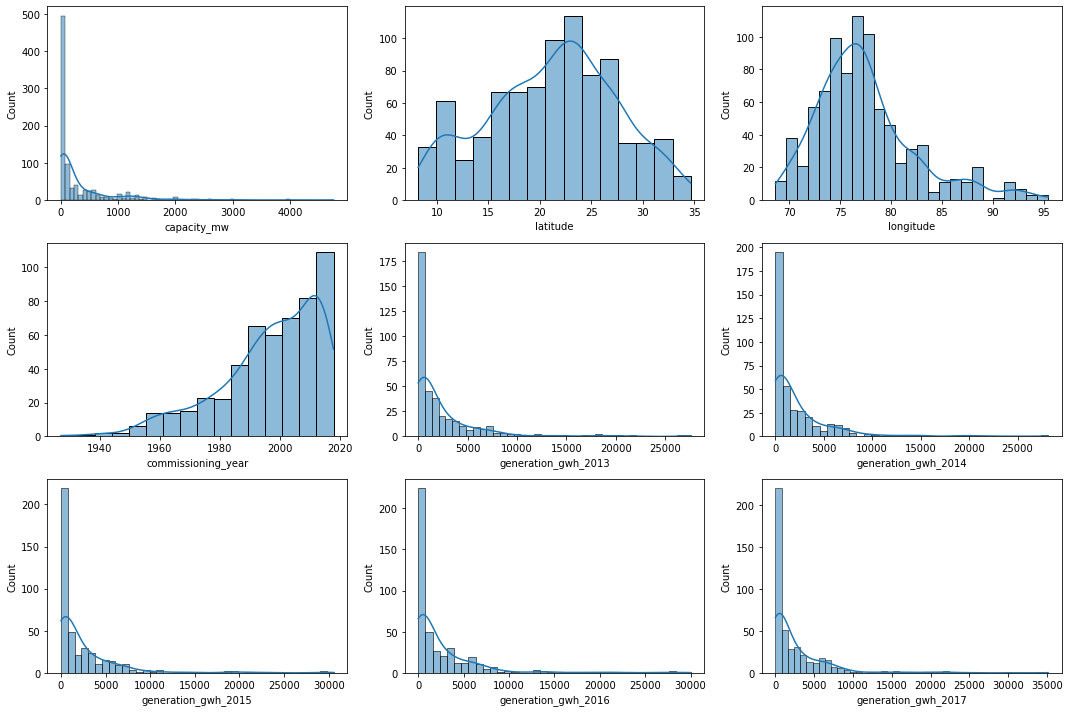

In [183]:
plt.figure(figsize=(15,10),facecolor='white')
x=1
for i in num_df.columns:
    if x<=9:
        plt.subplot(3,3,x)
        sns.histplot(num_df[i],kde=True)
        x+=1
plt.tight_layout()
plt.show()

Observation:
- Almost all data in numerical columns is skewed, even the target column is skewed

Les check the relation with the target column.

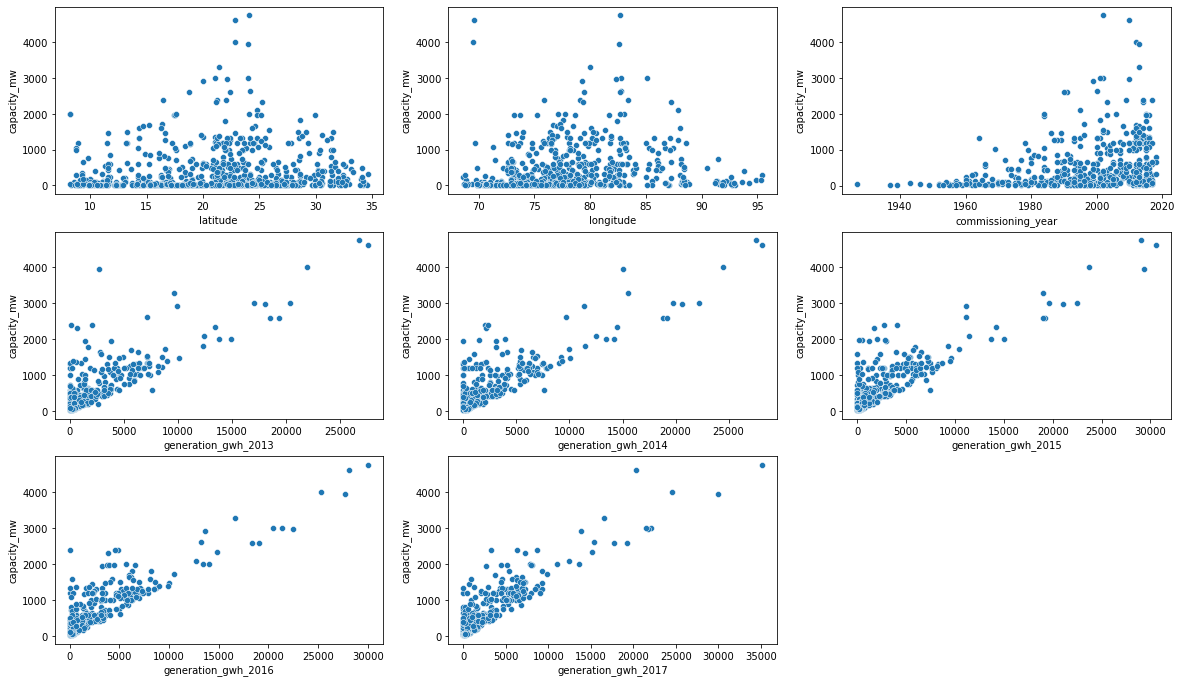

In [198]:

plt.figure(figsize=(20,20),facecolor='white')
no=1
for col in num_df.columns[1:]:
    if no<=9:
        plt.subplot(5,3,no)
        sns.scatterplot(num_df[col],num_df["capacity_mw"],palette="flare")
        plt.ylabel('capacity_mw')
    no+=1


Observation:
- Linear relation between generation and India's power capacity.
- Latitude is between 20-25 where capacity touches the apex whereas Longitude is between 75-75.

### Lets Impute null values now:

In [241]:
null_percent=df.isnull().sum() * 100 / len(df)
null_df=pd.DataFrame({"column":df.columns,"null_value_percentage":null_percent})
null_df

,column,null_value_percentage
capacity_mw,capacity_mw,0.000000
latitude,latitude,5.066079
longitude,longitude,5.066079
primary_fuel,primary_fuel,0.000000
other_fuel1,other_fuel1,78.083700
commissioning_year,commissioning_year,41.850220
owner,owner,62.334802
source,source,0.000000
url,url,0.000000
geolocation_source,geolocation_source,2.092511


__We can drop the column - "other_fuel1" as the the percentage>65% and then we can proceed with imputing numerical and categorical features__


In [242]:
df.drop(["other_fuel1"],inplace=True,axis=1)
df.shape

(908, 14)

__We can impute the categorical variable with mode and the numerical features with mean__

In [243]:
#numerical columns
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].mean(),inplace=True)
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(),inplace=True)
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(),inplace=True)
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(),inplace=True)
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(),inplace=True)
df["owner"].fillna(df["owner"].mode()[0],inplace=True)
# categorical columns
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)



In [244]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

# Data Transformation:

## Checking outliers:

In [252]:
num_df= df.select_dtypes(include="float64") #Updating the imputed values to the num_df declared earlier

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>]],
      dtype=object)

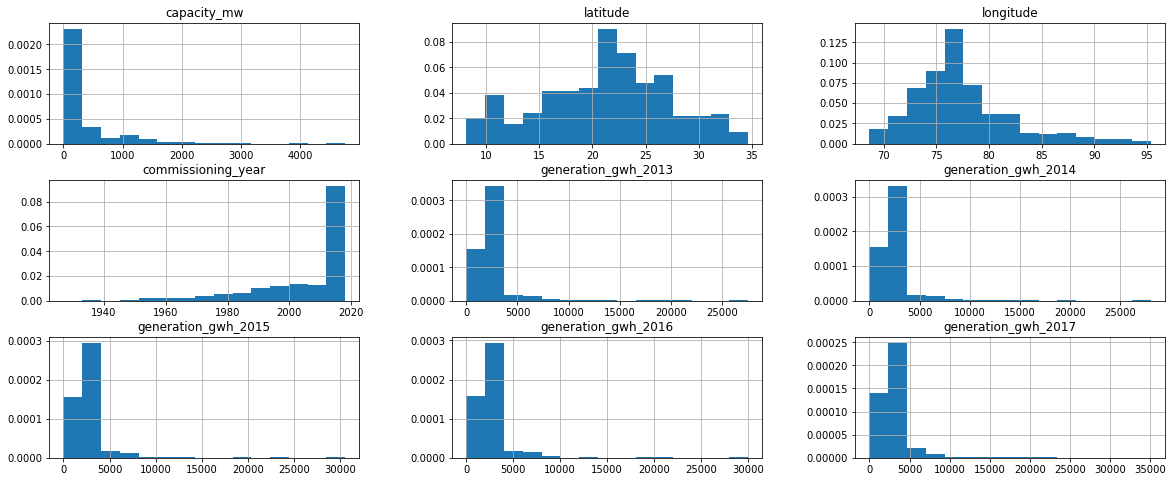

In [253]:
num_df.hist(bins=15,figsize=(20,8),density=True)

In [254]:
z = np.abs(zscore(num_df))
z.shape

(908, 9)

In [255]:
z

array([[5.49310543e-01, 1.14839610e+00, 8.80420380e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [3.84627594e-01, 5.86730280e-01, 5.94079309e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [4.86024006e-01, 1.16292425e-01, 1.68976343e+00, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       ...,
       [5.09648681e-01, 9.72986914e-01, 3.90650123e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [4.15667312e-01, 5.18313414e-01, 7.74321627e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [5.25168540e-01, 1.85081984e+00, 6.05876281e-03, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16]])

In [256]:
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 539, 542, 547, 575, 584, 602, 622, 639, 649, 649, 649,
       649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696,
       696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
       727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
       808, 809, 809, 809, 809, 809, 819, 848, 849, 849, 881, 881, 881,
       881, 881, 881], dtype=int64), array([0, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 2, 2, 0, 4, 5, 6, 7, 8, 3, 2,
       2, 0, 4, 5, 6, 7, 8, 2, 2, 2, 3, 2, 0, 0, 4, 5, 6, 7, 8, 3, 0, 2,
       2, 2, 3, 3, 3, 0, 3, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 2,
       4, 3, 3, 2, 3, 3

In [274]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
print(df.shape)


(850, 14)
(908, 14)


__Here, we updated the dataframe using the value of zscore we found by using numerical columns and kept only those num erical datapoints whose zscore is less than 3. We basically removed 58 numerical datapoints, reducing the size of the whole dataframe to 850,14__ 

## Checking Skewness:

In [275]:
df_new.skew()

capacity_mw            1.986878
latitude              -0.107673
longitude              0.868587
commissioning_year    -1.616272
generation_gwh_2013    1.547085
generation_gwh_2014    1.455721
generation_gwh_2015    1.335529
generation_gwh_2016    1.359881
generation_gwh_2017    1.254465
dtype: float64

__It's highly advisable to not remove skewness from the target column, so we won't transform the "capacity_mw" column which is the target column for the classification problem__

Lets create histograms once again so we can compare visually the change in skewness.

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>]], dtype=object)

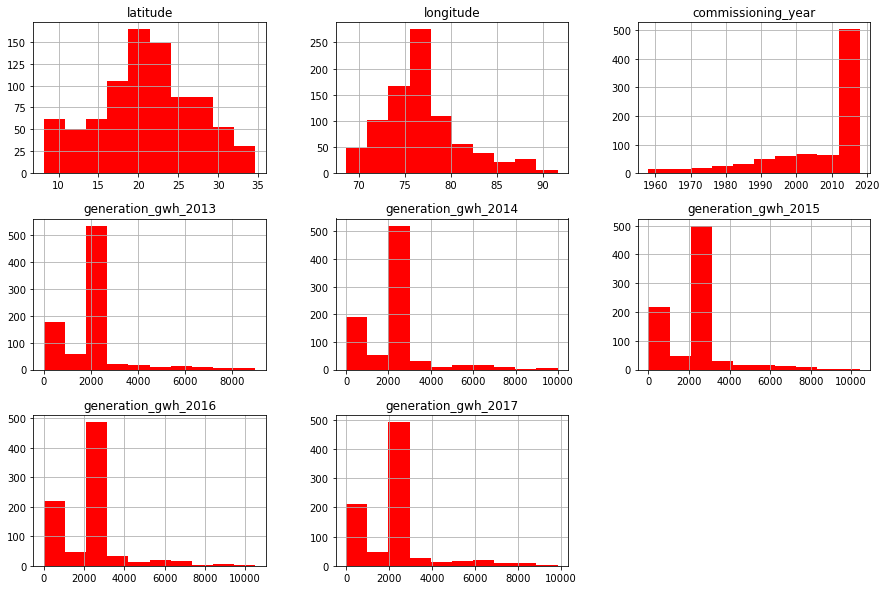

In [264]:
df_new.hist(color='r',figsize=(15,10),column=df_new.columns[1:])

In [276]:
for col in num_df.columns[1:]:
    df_new[col]=np.sqrt(df_new[col])
df_new.skew()

capacity_mw            1.986878
latitude              -0.448916
longitude              0.778925
commissioning_year    -1.622185
generation_gwh_2013   -0.499494
generation_gwh_2014   -0.507409
generation_gwh_2015   -0.469085
generation_gwh_2016   -0.420680
generation_gwh_2017   -0.445532
dtype: float64

__We've successfully reduced the skewness in every column to the range +/-0.5 except "commissioning year"__

## Encoding categorical data:

In [280]:
cat_df=df_new.select_dtypes(include="object")

In [281]:
cat_df.columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source'], dtype='object')

In [282]:
le = LabelEncoder()

In [283]:
for col in cat_df.columns:
    df_new[col]=le.fit_transform(df_new[col])

In [284]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,5.308851,8.558078,6,44.844175,228,109,128,1,48.000617,49.197493,49.133210,49.537221,50.316543
1,98.0,4.976575,8.637650,1,44.866469,257,174,173,2,48.000617,49.197493,49.133210,49.537221,50.316543
2,39.2,4.680150,8.329058,7,44.866469,2,21,205,2,48.000617,49.197493,49.133210,49.537221,50.316543
3,135.0,4.885816,9.558253,2,44.766059,5,22,58,2,25.135193,24.855367,29.047323,29.765827,25.763822
4,1800.0,4.686182,9.077946,1,44.888751,5,22,58,2,40.844706,55.095826,76.917943,79.012657,73.386509


In [286]:
df_new.shape

(850, 14)

# Classification: Prediction for Primary Fuel

In [311]:
x=df_new.drop(["primary_fuel","capacity_mw"],axis=1)
y=df_new['primary_fuel']

In [312]:
x.shape, y.shape

((850, 12), (850,))

__It's always advisable to not perform scaling on target variable as it change the values that the model needs to make a pattern out of. So, we'll only perform scaling on the input variables that are stored in x__

In [313]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

Now we are done with Data Transformation steps, we can now proceed to check the __Multicollinearity__ and therefore select appropriate features for model building.

Lets' check the heatmap so we can check if there's any multicollinearity between the input variables and remove it using VIF.

<AxesSubplot:>

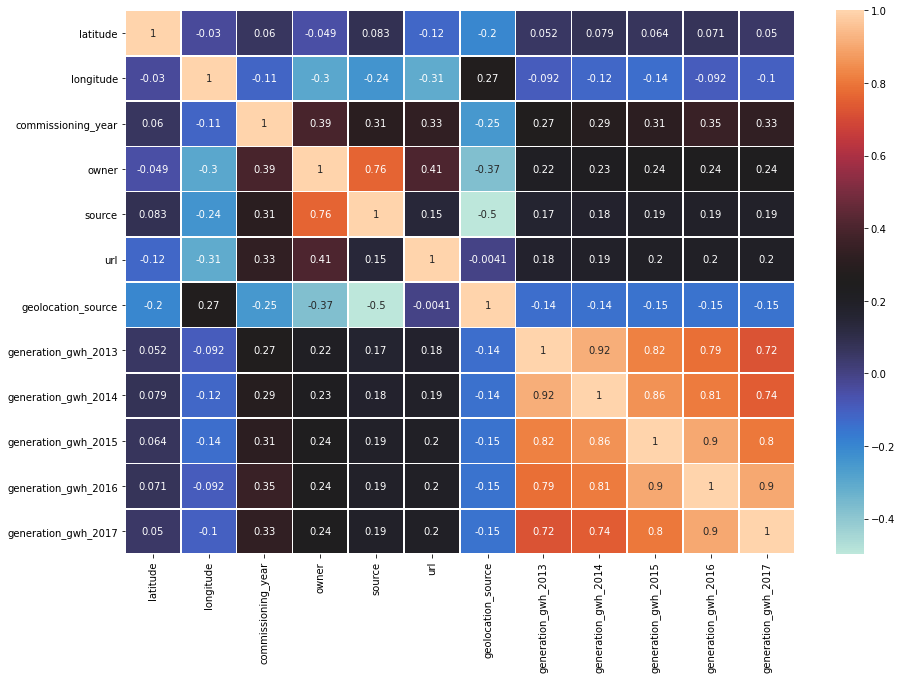

In [314]:
plt.figure(figsize=(15,10))
sns.heatmap(x_scaled.corr(),annot=True,cmap="icefire",linewidth=0.7)

We can see that the correlation is really high between the generation data from 2013 to 2017. Correlation is also high between owner and source

In [315]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [316]:
X=x_scaled #we have to check multicollinearity between input features which have been scaled and are stored in x
calc_vif(X)

,variables,VIF
0,latitude,1.098039
1,longitude,1.242836
2,commissioning_year,1.375529
3,owner,3.228354
4,source,2.955360
5,url,1.499293
6,geolocation_source,1.478913
7,generation_gwh_2013,6.471526
8,generation_gwh_2014,8.007297
9,generation_gwh_2015,7.662481


A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity.

As we can see we have a single column with higher than 10 VIF. We can drop it, as we saw in EDA process, that most of the generation graphs were similar and the data has been mostly captured by each of the generation variables.

In [320]:
x_scaled.drop(["generation_gwh_2016"],axis=1,inplace=True)

In [322]:
x_scaled.shape

(850, 11)

In [323]:
X=x_scaled #we have to check multicollinearity between input features which have been scaled and are stored in x
calc_vif(X)

,variables,VIF
0,latitude,1.095907
1,longitude,1.232673
2,commissioning_year,1.359414
3,owner,3.228341
4,source,2.955256
5,url,1.499279
6,geolocation_source,1.478906
7,generation_gwh_2013,6.436962
8,generation_gwh_2014,7.998664
9,generation_gwh_2015,5.049429


__Multicollinearity is within the range and we can proceed to the next step and find the best random state__

### Best Random State:

In [324]:
y.value_counts()

1    237
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

<AxesSubplot:>

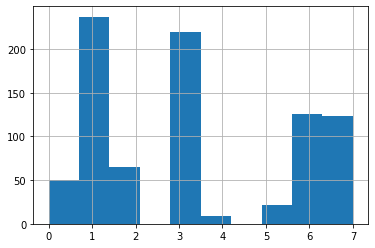

In [325]:
y.hist()

As evident from above, we can see that class imbalance isn't prominent and we won't require any class imbalance techniques as are needed in classification problems.

In [340]:
l=[]
for i in range(0,500):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State = ",i)
        print("Training accuracy score: ",(accuracy_score(y_train,pred_train)*100))
        print("Testing accuracy score: ",(accuracy_score(y_test,pred_test)*100))
        l.append(i)
    

At Random State =  26
Training accuracy score:  74.56828885400314
Testing accuracy score:  74.64788732394366
At Random State =  30
Training accuracy score:  74.56828885400314
Testing accuracy score:  74.64788732394366


We can choose this as our random state for further models as this is where our data is performance is almost equal in both cases.
- At Random State =  30
- Training accuracy score:  74.56828885400314
- Testing accuracy score:  74.64788732394366

In [341]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=30)

### Model 1: Decision Tree Classifier

In [344]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
                  "min_samples_leaf":  list(range(5,20,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 9}
Best Score for Decision Tree:  0.7803395669291338


In [345]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test) 

In [346]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.72      0.85      0.78        60
           2       0.17      0.15      0.16        13
           3       0.83      0.81      0.82        62
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       1.00      1.00      1.00        30
           7       0.94      1.00      0.97        29

    accuracy                           0.78       213
   macro avg       0.53      0.55      0.54       213
weighted avg       0.74      0.78      0.76       213



<AxesSubplot:title={'center':'Feature Importances of Decision Tree'}, xlabel='Importance'>

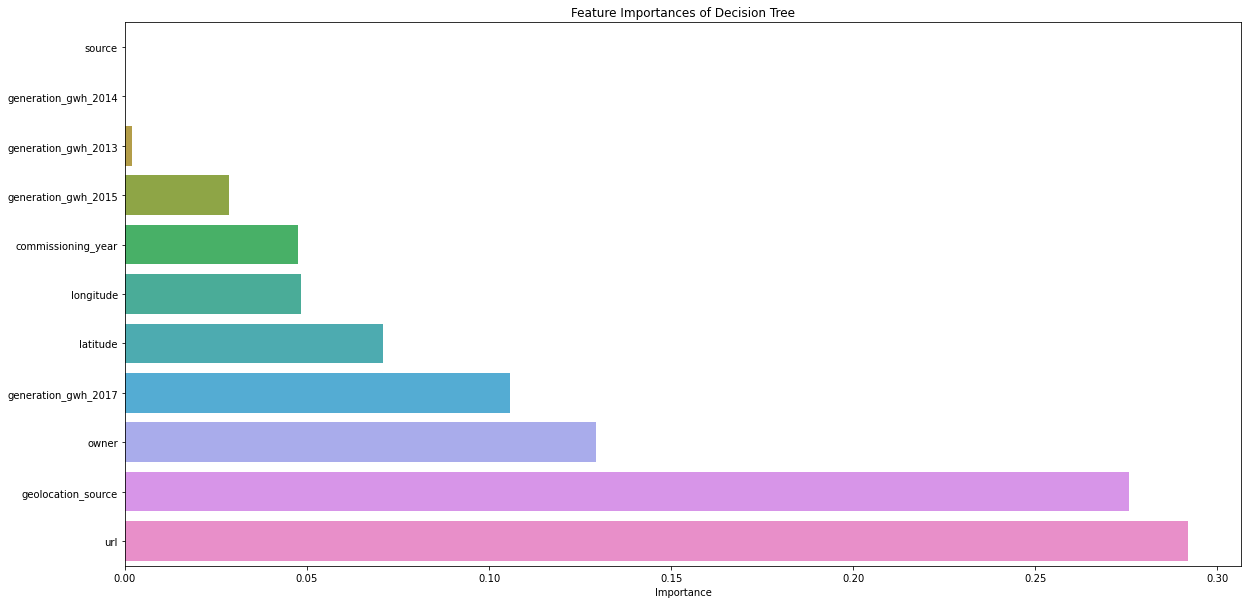

In [348]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=x_scaled.columns).sort_values(by="Importance")
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"],feat.index)

In [350]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,x_scaled,y,cv=k)
    dtc=dtscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  75.52941176470588
accuracy score is :  78.40375586854461


At cv=  3
Cross Val score :  75.05972229134524
accuracy score is :  78.40375586854461


At cv=  4
Cross Val score :  76.58561431481974
accuracy score is :  78.40375586854461


At cv=  5
Cross Val score :  77.05882352941175
accuracy score is :  78.40375586854461


At cv=  6
Cross Val score :  76.58409083341658
accuracy score is :  78.40375586854461


At cv=  7
Cross Val score :  76.82176244024232
accuracy score is :  78.40375586854461


At cv=  8
Cross Val score :  78.11673426203491
accuracy score is :  78.40375586854461


At cv=  9
Cross Val score :  76.94413338310314
accuracy score is :  78.40375586854461




In [353]:
dtscore_selected = cross_val_score(dec_tree,x,y,cv =8 ).mean()
print("The cv score is: ", dtscore_selected, "\nThe accuracy score is: ",dts)

The cv score is:  0.7811673426203491 
The accuracy score is:  0.784037558685446


roc_curve can only be used for binary classification problem.

### Model2: Random forest

In [359]:
forest_params = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)),
                  "min_samples_leaf": list(range(5,20,1)),"n_estimators":[100,150,200,250,300,350]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

Best Parameters for Random Forest:  {'n_estimators': 300, 'min_samples_leaf': 10, 'max_depth': 9, 'bootstrap': False}
Best Score for Random Forest:  0.7801919291338583




In [360]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=10,n_jobs=4,n_estimators=300).fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

<AxesSubplot:title={'center':'Feature Importances of Random Forest'}, xlabel='Importance'>

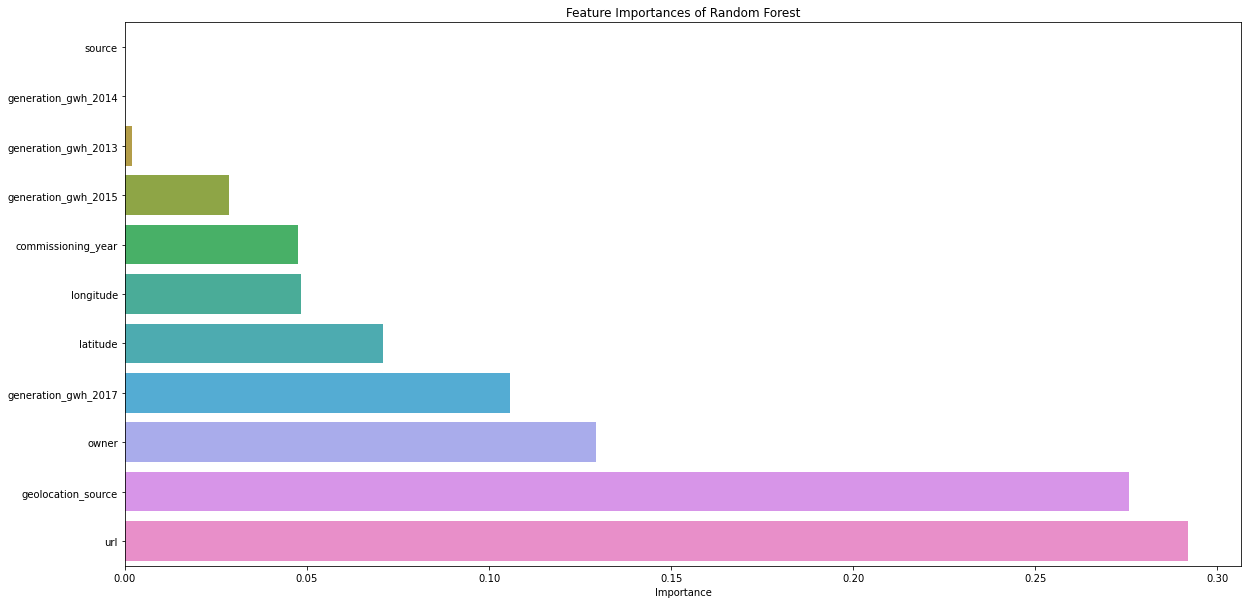

In [371]:
feat2=pd.DataFrame({"Importance": forest_clf.feature_importances_}, 
                  index=x_scaled.columns).sort_values(by="Importance")
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Random Forest")

sns.barplot(feat["Importance"],feat.index)

In [361]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.72      0.85      0.78        60
           2       0.17      0.15      0.16        13
           3       0.83      0.81      0.82        62
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       1.00      1.00      1.00        30
           7       0.94      1.00      0.97        29

    accuracy                           0.78       213
   macro avg       0.53      0.55      0.54       213
weighted avg       0.74      0.78      0.76       213



In [362]:
pred_rfc = rfc.predict(X_test)
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,10):
    rsscore=cross_val_score(rfc,x_scaled,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  78.94117647058823
accuracy score is :  83.09859154929578


At cv=  3
Cross Val score :  79.17724248909238
accuracy score is :  83.09859154929578


At cv=  4
Cross Val score :  79.29289573921517
accuracy score is :  83.09859154929578


At cv=  5
Cross Val score :  80.35294117647058
accuracy score is :  83.09859154929578


At cv=  6
Cross Val score :  79.64738787333934
accuracy score is :  83.09859154929578


At cv=  7
Cross Val score :  79.65045386803958
accuracy score is :  83.09859154929578


At cv=  8
Cross Val score :  80.23717157467819
accuracy score is :  83.09859154929578


At cv=  9
Cross Val score :  80.70424287669529
accuracy score is :  83.09859154929578




In [363]:
rsscore_selected = cross_val_score(rfc,x_scaled,y,cv = 9).mean()
print("The cv score is: ", rsscore_selected, "\nThe accuracy score is: ",rss)

The cv score is:  0.8047032474804032 
The accuracy score is:  0.8309859154929577


### Model 3: SVC

In [372]:
from sklearn.svm import SVC
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,20.0,50.0,70.0, 100.0],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], "gamma":[0.0001,.001,0.01,0.1,1,10,100]}
rand_svc = RandomizedSearchCV(SVC(), svc_params)
rand_svc.fit(X_train, y_train)
# SVC best estimator
svc = rand_svc.best_estimator_
print("Best Parameters for SVM: ", rand_svc.best_params_)
print("Best Score for SVM: ", rand_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  {'kernel': 'poly', 'gamma': 0.1, 'C': 100.0}
Best Score for SVM:  0.7738312007874015
------------------------------------------


In [373]:
tree_params =  {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,20.0,50.0,70.0, 100.0],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],"gamma":[.001,0.01,0.1,1,10,100]}

grid_tree = GridSearchCV(SVC(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)

Best Parameters for Decision Tree:  {'C': 20.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score for Decision Tree:  0.7942913385826771


In [374]:
svm = SVC(C=20.0, kernel='rbf',gamma = 0.1).fit(X_train, y_train)
pred_train4 = svm.predict(X_train)
pred_test4 = svm.predict(X_test) 

In [375]:
print(classification_report(y_test,pred_test4))

              precision    recall  f1-score   support

           0       0.36      0.62      0.45         8
           1       0.74      0.80      0.77        60
           2       0.56      0.38      0.45        13
           3       0.85      0.84      0.85        62
           4       0.00      0.00      0.00         1
           5       0.80      0.40      0.53        10
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        29

    accuracy                           0.81       213
   macro avg       0.66      0.63      0.63       213
weighted avg       0.82      0.81      0.81       213



In [376]:
pred_test4 = svm.predict(X_test) 

svms = accuracy_score(y_test,pred_test4)
for k in range(2,10):
    svmsscore=cross_val_score(svm,x_scaled,y,cv=k)
    svmsc=svmsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",svmsc*100)
    print("accuracy score is : ",svms*100)
    print("\n")

At cv=  2
Cross Val score :  78.94117647058823
accuracy score is :  81.2206572769953


At cv=  3
Cross Val score :  80.93946482191144
accuracy score is :  81.2206572769953


At cv=  4
Cross Val score :  81.76155992559129
accuracy score is :  81.2206572769953


At cv=  5
Cross Val score :  82.35294117647058
accuracy score is :  81.2206572769953


At cv=  6
Cross Val score :  82.47178104085505
accuracy score is :  81.2206572769953


At cv=  7
Cross Val score :  83.17107631563667
accuracy score is :  81.2206572769953


At cv=  8
Cross Val score :  82.59125374713454
accuracy score is :  81.2206572769953


At cv=  9
Cross Val score :  81.99825805648874
accuracy score is :  81.2206572769953




In [377]:
svmscore_selected = cross_val_score(svm,x_scaled,y,cv = 9).mean()
print("The cv score is: ", svmscore_selected, "\nThe accuracy score is: ",svms)

The cv score is:  0.8199825805648874 
The accuracy score is:  0.812206572769953


__We can conclude that the best model is RandomForest Classifier where:__
- The cross validation score is:  0.8047032474804032 
- The accuracy score is:  0.8309859154929577

In [378]:
# save the model to disk
import pickle
model_file_path='Power_Plant_Classification_.pkl'
pickle.dump(rfc, open(model_file_path, 'wb'))

# Regression: Prediction for Capacity_MW

In [380]:
xr=x_scaled
yr=df_new['capacity_mw']

In [381]:
xr.shape,yr.shape

((850, 12), (850,))

As we have defined the x and y again, we don't need to perform scaling here again as we are using the same input features for both classification problem(ie:input features exluding the 2 target columns)

In [382]:
xr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             850 non-null    float64
 1   longitude            850 non-null    float64
 2   commissioning_year   850 non-null    float64
 3   owner                850 non-null    int32  
 4   source               850 non-null    int32  
 5   url                  850 non-null    int32  
 6   geolocation_source   850 non-null    int32  
 7   generation_gwh_2013  850 non-null    float64
 8   generation_gwh_2014  850 non-null    float64
 9   generation_gwh_2015  850 non-null    float64
 10  generation_gwh_2016  850 non-null    float64
 11  generation_gwh_2017  850 non-null    float64
dtypes: float64(8), int32(4)
memory usage: 105.3 KB


### Best Random State:

<AxesSubplot:>

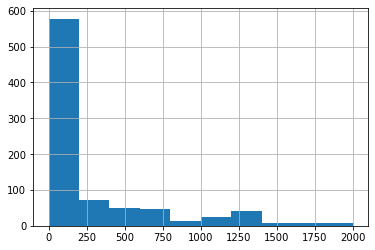

In [385]:
yr.hist()

In [390]:
for i in range(0,1000):
    X_train,X_test,y_train,y_test=train_test_split(xr,yr,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
        print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
        print("\n")

At random state 361,the training accuracy is:- 0.43087490148776597
At random state 361,the testing accuracy is:- 0.43072068445474465


At random state 975,the training accuracy is:- 0.42931884936405096
At random state 975,the testing accuracy is:- 0.42860055483943527




In [393]:
xtrain, xtest, ytrain, ytest = train_test_split(xr, yr, test_size=0.2, random_state=361)

In [ ]:
### Model1: Linear Regression

In [394]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
pred_lr= lr.predict(xtest)

In [395]:
lrr2 = r2_score(ytest,pred_lr)

for k in range(2,10):
    lsscore=cross_val_score(lr,xr,yr,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lrr2*100)
    print("\n")

At cv=  2
Cross Val score :  36.4915531389968
r2 score is :  43.072068445474464


At cv=  3
Cross Val score :  36.79975181406756
r2 score is :  43.072068445474464


At cv=  4
Cross Val score :  36.96635493468779
r2 score is :  43.072068445474464


At cv=  5
Cross Val score :  37.631094545064094
r2 score is :  43.072068445474464


At cv=  6
Cross Val score :  38.49001538064488
r2 score is :  43.072068445474464


At cv=  7
Cross Val score :  36.34002587421224
r2 score is :  43.072068445474464


At cv=  8
Cross Val score :  37.6664830917189
r2 score is :  43.072068445474464


At cv=  9
Cross Val score :  36.136624755502886
r2 score is :  43.072068445474464




In [396]:
lsscore_selected = cross_val_score(lr,xr,yr,cv = 6).mean()
print("The cv score is: ", lsscore_selected, "\nThe r2 score is: ",lrr2)

The cv score is:  0.38490015380644876 
The r2 score is:  0.43072068445474465


In [397]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, pred_lr))
print('MSE:', metrics.mean_squared_error(ytest, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred_lr)))

MAE: 266.963225932691
MSE: 134294.05841912903
RMSE: 366.46153743487054


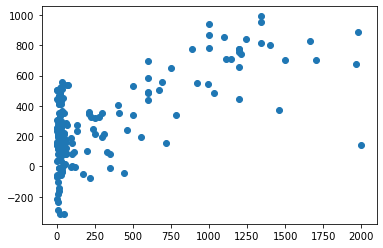

In [399]:
plt.scatter(x=ytest,y=pred_lr)

### Model2: Decision Tree Regressor

In [400]:
xtrain, xtest, ytrain, ytest = train_test_split(xr, yr, test_size=0.2, random_state=361)

In [402]:
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 40, 15],
              "max_depth": [2, 6, 8, 10],
              "min_samples_leaf": [20, 40, 100, 120],
              "max_leaf_nodes": [5, 20, 100,120],
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(xtrain, ytrain)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("best r2 score: ",grid_dt_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}
best r2 score:  0.7440798953172836
------------------------------------------


In [446]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 8, max_leaf_nodes= 100, min_samples_leaf= 20, min_samples_split= 10)
dtr.fit(xtrain, ytrain)
pred_dtr= dtr.predict(xtest)

In [447]:
dtrr2 = r2_score(ytest,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,xr,yr,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  71.61166878681087
r2 score is :  74.54052606099822


At cv=  3
Cross Val score :  73.06510768904025
r2 score is :  74.54052606099822


At cv=  4
Cross Val score :  72.62708101967254
r2 score is :  74.54052606099822


At cv=  5
Cross Val score :  73.84072232947257
r2 score is :  74.54052606099822


At cv=  6
Cross Val score :  73.9712365427423
r2 score is :  74.54052606099822


At cv=  7
Cross Val score :  72.6540382385636
r2 score is :  74.54052606099822


At cv=  8
Cross Val score :  73.03862469234971
r2 score is :  74.54052606099822


At cv=  9
Cross Val score :  71.78516883500043
r2 score is :  74.54052606099822




In [405]:
dtrscore_selected = cross_val_score(dtr,xr,yr,cv = 6).mean()
print("The cv score is: ", dtrscore_selected, "\nThe r2 score is: ",dtrr2)

The cv score is:  0.739712365427423 
The r2 score is:  0.7454052606099821


In [407]:
print('MAE:', metrics.mean_absolute_error(ytest, pred_dtr))
print('MSE:', metrics.mean_squared_error(ytest, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred_dtr)))

MAE: 107.49435823912728
MSE: 60059.376603378434
RMSE: 245.0701462915841


Text(0, 0.5, 'Y Pred')

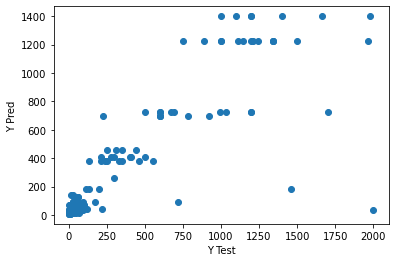

In [408]:
plt.scatter(x=ytest,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## Model3 - XGB Regressor

In [418]:
from xgboost import XGBRegressor

In [423]:
params = {'booster' : ['gbtree','dart','gblinear'], 'importance_type' : ['gain','split'],'n_estimators' : [100,200,500],'eta' : [0.001, 0.01, 0.1]}
grid_xgb_reg = GridSearchCV(XGBRegressor(), params)
grid_xgb_reg.fit(xtrain, ytrain)

xgb_reg = grid_xgb_reg.best_estimator_
print("Best Estimators for XGB Regression: ", grid_xgb_reg.best_params_)
print("best r2 score: ",grid_xgb_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'booster': 'gbtree', 'eta': 0.1, 'importance_type': 'gain', 'n_estimators': 100}
best r2 score:  0.7772637359841059
------------------------------------------


In [448]:
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
xgb.score(xtrain,ytrain)
pred_xgb = xgb.predict(xtest)

In [449]:
xgbs = r2_score(ytest,pred_xgb)

for k in range(2,10):
    xgbscore=cross_val_score(xgb,xr,yr,cv=k)
    xgbcv=xgbscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",xgbcv*100)
    print("r2 score is : ",xgbs*100)
    print("\n")

At cv=  2
Cross Val score :  72.10597842727555
r2 score is :  76.47676345155934


At cv=  3
Cross Val score :  75.28522982350677
r2 score is :  76.47676345155934


At cv=  4
Cross Val score :  74.14869738739239
r2 score is :  76.47676345155934


At cv=  5
Cross Val score :  72.6740555906549
r2 score is :  76.47676345155934


At cv=  6
Cross Val score :  74.27472787739792
r2 score is :  76.47676345155934


At cv=  7
Cross Val score :  75.31898030634278
r2 score is :  76.47676345155934


At cv=  8
Cross Val score :  74.23562104966273
r2 score is :  76.47676345155934


At cv=  9
Cross Val score :  74.60918547446742
r2 score is :  76.47676345155934




__After trying to hypertune, I founf the default values of XGBRegressor, is giving better results than hypertuned model. Thus, I decided to go with a default xgbregressor model__

At cv=  7
- Cross Val score :  75.31898030634278
- r2 score is :  76.47676345155934

In [450]:
print('MAE:', metrics.mean_absolute_error(ytest, pred_xgb))
print('MSE:', metrics.mean_squared_error(ytest, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred_xgb)))

MAE: 108.66167717523786
MSE: 55491.75627815606
RMSE: 235.56688281283527


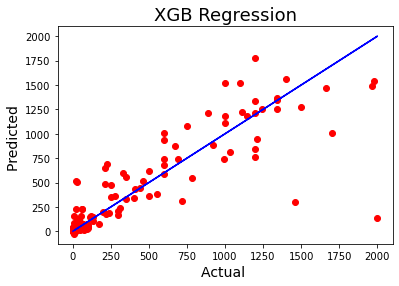

In [451]:
plt.figure(figsize=(6,4))
plt.scatter(x=ytest, y=pred_xgb, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

We can conclude from the above finding that XGB Regressor emerges on the top with:
- At cv=  7
- Cross Val score :  75.31898030634278
- r2 score is :  76.47676345155934

In [452]:
filename = "Power_Plant_Regression.pkl"
pickle.dump(xgb,open(filename,'wb'))
#saving the file